# FastWoe Tree deep dive

In [ ]:
import warnings

import numpy as np
import pandas as pd
from fastwoe import FastWoe
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

warnings.filterwarnings("ignore")

In [2]:
X, y = make_classification(
    n_samples=1000,
    n_features=5,
    n_informative=3,
    n_redundant=0,
    n_clusters_per_class=1,
    flip_y=0.03,
    weights=[0.95, 0.05],
    random_state=42,
)

X = pd.DataFrame(X, columns=[f"x_{i}" for i in range(X.shape[1])])
y = pd.Series(y, name="y")

,feature,coef
0,x_0,0.0
1,x_1,0.0
2,x_2,0.0
3,x_3,0.0
4,x_4,0.0


-2.699159030833118 -2.6995485558468895


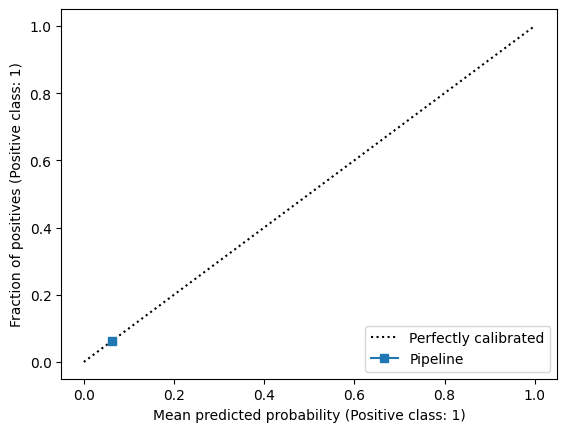

In [29]:
binning_params = dict(
    binning_method="tree",
    tree_kwargs=dict(
        max_depth=1,
    ),
)

woe_lr_model = Pipeline(
    [
        (
            "binning",
            FastWoe(**binning_params),
        ),
        (
            "model",
            LogisticRegression(fit_intercept=True, solver="newton-cg", penalty=None),
        ),
    ]
)

# pipeline with intercept
woe_lr_model.fit(X, y)

# Print coefficients
coef_results = pd.DataFrame(
    {"feature": X.columns, "coef": woe_lr_model.named_steps["model"].coef_[0]}
)
display(coef_results)

print(
    float(woe_lr_model[-1].intercept_), float(np.log(y.mean()) - np.log(1 - y.mean()))
)
clb = CalibrationDisplay.from_estimator(woe_lr_model, X, y)
plt.show()

In [42]:
binner.get_mapping("x_0")

,category,count,count_pct,good_count,bad_count,event_rate,woe,woe_se,woe_ci_lower,woe_ci_upper
0,"(-∞, 0.3]",1000.0,100.0,937.0,63.0,0.063,0.0,0.130155,-0.255099,0.255099
1,"(0.3, ∞)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[Text(0.5, 0.75, 'x[0] <= 0.302\ngini = 0.118\nsamples = 1000\nvalue = [937, 63]'),
 Text(0.25, 0.25, 'gini = 0.097\nsamples = 625\nvalue = [593, 32]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.152\nsamples = 375\nvalue = [344, 31]'),
 Text(0.625, 0.5, '  False')]

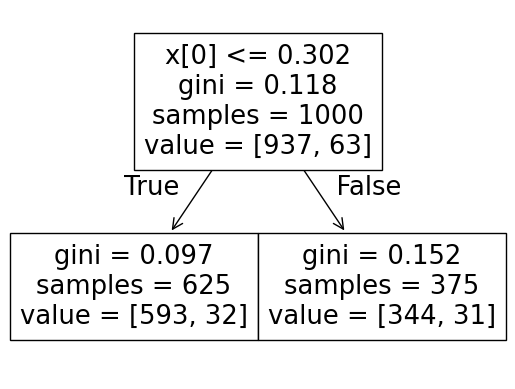

In [ ]:
from sklearn import tree

tree.plot_tree(binner.binners_["x_0"])